# Airline Passenger Satisfaction

What factors lead to customer satisfaction for an Airline?


## Appendex
- Cick on the links:
    >1.  <a href=#imports>Imports</a>
    >2.  <a href=#loaddata>Load Data</a>
    >3.  <a href=#dataformating>Data Formating & Feature Engineering</a>
    >4.  <a href=#Expl>Create X and y</a>
    >5.  <a href=#Ques> Dummy variables and label encoder </a>
    >6.  <a href=#d> Split the data</a>
    >7.  <a href=#b> Baseline Model </a>
    >8.  <a herf=#ss>Standerd Scale with grid search</a>
    >9.  <a herf=#ssss> Decision Tree & GridSearchCV Tune the parameters</a>
    >10. <a herf=#Rf>Random Forest with GridSearchCV Tune the parameters</a>
    >11. <a herf=#we>Soft voting </a>
    >12. <a herf=#sc>  Stacking Classifier </a>  
    >13. <a herf=#cm> Confution Matrix </a> 
    >14. <a herf=#jp>  XGboost</a>       

    

# Abstract

What factors lead to customer satisfaction for an Airline? This dataset contains an airline passenger satisfaction survey. What factors are highly correlated to a satisfied (or dissatisfied) passenger? Can you predict passenger satisfaction?

# Design

This project is one of the T5 Data Science Boot Camp requirements. Data provided by Kaggle. In this module we will be laying the foundation for our analysis by processing and exploring a large amount of data and classify it by using classification modules. The dataset contains an airline passenger satisfaction survey. 



# <a name='imports' > Import Libraries </a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
sns.set()
# modeling imports
from sklearn.metrics import accuracy_score
import pickle
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, accuracy_score, roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.metrics import precision_score, recall_score, precision_recall_curve, fbeta_score,f1_score ,confusion_matrix, classification_report, make_scorer
from mlxtend.classifier import StackingClassifier # <-- note: this is not from sklearn!
from sklearn import linear_model, neighbors, ensemble
import xgboost as xgb
from sklearn.metrics import confusion_matrix
sns.set_style("whitegrid")
%config InlineBackend.figure_format = 'png'

In [2]:
def model_eval(mdl_local, X_local, y_local, bta = 1):
    y_pred = mdl_local.predict(X_local)
    print(f"F({bta}):", fbeta_score(y_local, y_pred, beta= bta))
    print("Precision :", precision_score(y_local, y_pred))
    print("Recall :", recall_score(y_local, y_pred))
    

def make_confusion_matrix(title, model, X_local, y_local, threshold=0.5):
    # Predict class 1 if probability of being in class 1 is greater than threshold
    # (model.predict(X_test) does this automatically with a threshold of 0.5)
    y_predict = (model.predict_proba(X_local)[:, 1] >= threshold)
    fraud_confusion = confusion_matrix(y_local, y_predict)
    plt.figure(dpi=80)
    sns.heatmap(fraud_confusion, cmap=plt.cm.Blues, annot=True, square=True, fmt='d',
           xticklabels=['Satisfied', 'Dissatisfied'],
           yticklabels=['Satisfied', 'Dissatisfied']);
    plt.xlabel('prediction')
    plt.ylabel('actual')
    plt.title(title);


# <a name='loaddata' > Load Data </a>

In [3]:
df = pd.read_csv('Airline.csv')

In [4]:
df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,...,2,2,2,2,4,2,4,0,20.0,satisfied


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25976 entries, 0 to 25975
Data columns (total 25 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed: 0                         25976 non-null  int64  
 1   id                                 25976 non-null  int64  
 2   Gender                             25976 non-null  object 
 3   Customer Type                      25976 non-null  object 
 4   Age                                25976 non-null  int64  
 5   Type of Travel                     25976 non-null  object 
 6   Class                              25976 non-null  object 
 7   Flight Distance                    25976 non-null  int64  
 8   Inflight wifi service              25976 non-null  int64  
 9   Departure/Arrival time convenient  25976 non-null  int64  
 10  Ease of Online booking             25976 non-null  int64  
 11  Gate location                      25976 non-null  int

# <a name='dataformating' > Data Formating & Features Engineering</a>

In [6]:
df.drop(['Gate location','Unnamed: 0', 'id'], axis= 'columns', inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25976 entries, 0 to 25975
Data columns (total 22 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             25976 non-null  object 
 1   Customer Type                      25976 non-null  object 
 2   Age                                25976 non-null  int64  
 3   Type of Travel                     25976 non-null  object 
 4   Class                              25976 non-null  object 
 5   Flight Distance                    25976 non-null  int64  
 6   Inflight wifi service              25976 non-null  int64  
 7   Departure/Arrival time convenient  25976 non-null  int64  
 8   Ease of Online booking             25976 non-null  int64  
 9   Food and drink                     25976 non-null  int64  
 10  Online boarding                    25976 non-null  int64  
 11  Seat comfort                       25976 non-null  int

In [8]:
df.nunique()

Gender                                  2
Customer Type                           2
Age                                    75
Type of Travel                          2
Class                                   3
Flight Distance                      3281
Inflight wifi service                   6
Departure/Arrival time convenient       6
Ease of Online booking                  6
Food and drink                          6
Online boarding                         6
Seat comfort                            5
Inflight entertainment                  6
On-board service                        6
Leg room service                        6
Baggage handling                        5
Checkin service                         5
Inflight service                        6
Cleanliness                             6
Departure Delay in Minutes            313
Arrival Delay in Minutes              320
satisfaction                            2
dtype: int64

In [9]:
df.isna().sum()

Gender                                0
Customer Type                         0
Age                                   0
Type of Travel                        0
Class                                 0
Flight Distance                       0
Inflight wifi service                 0
Departure/Arrival time convenient     0
Ease of Online booking                0
Food and drink                        0
Online boarding                       0
Seat comfort                          0
Inflight entertainment                0
On-board service                      0
Leg room service                      0
Baggage handling                      0
Checkin service                       0
Inflight service                      0
Cleanliness                           0
Departure Delay in Minutes            0
Arrival Delay in Minutes             83
satisfaction                          0
dtype: int64

In [10]:
sum(df.duplicated())

0

In [11]:
df = df.dropna()

In [12]:
df.isna().sum()

Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

# <a name='Expl' > Creat X and Y</a>

In [13]:
X = df.drop(['satisfaction'], axis = 1)
y = df['satisfaction']

<AxesSubplot:>

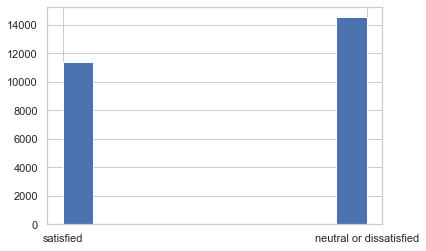

In [14]:
y.hist()

# <a name='Ques' > Dummy variables and label Encoder</a>

In [15]:
le = LabelEncoder()
y=le.fit_transform(y)

In [16]:
X= pd.get_dummies(X)

In [17]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25893 entries, 0 to 25975
Data columns (total 26 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                25893 non-null  int64  
 1   Flight Distance                    25893 non-null  int64  
 2   Inflight wifi service              25893 non-null  int64  
 3   Departure/Arrival time convenient  25893 non-null  int64  
 4   Ease of Online booking             25893 non-null  int64  
 5   Food and drink                     25893 non-null  int64  
 6   Online boarding                    25893 non-null  int64  
 7   Seat comfort                       25893 non-null  int64  
 8   Inflight entertainment             25893 non-null  int64  
 9   On-board service                   25893 non-null  int64  
 10  Leg room service                   25893 non-null  int64  
 11  Baggage handling                   25893 non-null  int

In [18]:
df.shape

(25893, 22)

# <a name='d' > Split the data </a>

In [19]:
#Split the data
X_train, X_val, y_train, y_val = \
        train_test_split(X, y, test_size=0.2, random_state=42)

# <a name='b' > Baseline Model  </a>

In [20]:
#Baseline for num cloumns
num_col =df.select_dtypes(include = np.number).columns.values.tolist()

In [21]:
X1 = df[num_col]
X1_train, X1_val, y_train, y_val = \
        train_test_split(X1, y, test_size=0.2, random_state=42)

lr = LogisticRegression()
lr.fit(X1_train, y_train)
print(lr.score(X1_train, y_train))
print(lr.score(X1_val, y_val))

model_eval(lr, X1_train, y_train, bta = 2)

0.7444240610215314
0.7555512647229194
F(2): 0.733498457393647
Precision : 0.6945073030240692
Recall : 0.74394006170119


In [22]:
#Dummy 
linear_model = LogisticRegression()
linear_model.fit(X_train, y_train)
print( linear_model.score(X_train, y_train))
print(linear_model.score(X_val, y_val))
model_eval(linear_model, X_train, y_train, bta = 2)

0.812059476682437
0.8198493917744738
F(2): 0.7915193570346297
Precision : 0.7806172171088251
Recall : 0.7942926399294844


# Pickle approach

In [23]:
# Save the Modle to file in the current working directory

Pkl_Filename = "Pickle_RL_Model.pkl"  

with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(linear_model, file)

In [24]:
# Load the Model back from file
with open(Pkl_Filename, 'rb') as file:  
    Pickled_LR_Model = pickle.load(file)

Pickled_LR_Model

LogisticRegression()

In [25]:

# Use the Reloaded Model to 
# Calculate the accuracy score and predict target values

# Calculate the Score 
score = Pickled_LR_Model.score(X_val, y_val)  
# Print the Score
print("Test score: {0:.2f} %".format(100 * score))  

# Predict the Labels using the reloaded Model
Ypredict = Pickled_LR_Model.predict(X_val)  

Ypredict

Test score: 81.98 %


array([1, 0, 1, ..., 0, 0, 0])

# <a name='ss' > Standerd Scale with the Grid search </a>

In [26]:
std_scale= StandardScaler()
std_scale.fit(X_train)
Xtrain_scale = std_scale.transform(X_train)
Xval_scale = std_scale.transform(X_val)

linear_model.fit(Xtrain_scale, y_train)
print(linear_model.score(Xtrain_scale, y_train))
print(linear_model.score(Xval_scale ,y_val))
model_eval(linear_model, Xtrain_scale, y_train, bta = 2)

0.8709085642560587
0.8710175709596447
F(2): 0.8392944417292398
Precision : 0.8675086107921929
Recall : 0.8325253415601587


In [27]:
# Grid search lr

In [28]:
parms = {"penalty":['l2','l1'],"C" : np.arange(0.1,3,0.2),"fit_intercept":[True, False]}

gs_cv = GridSearchCV(linear_model, param_grid = parms, n_jobs=-1, cv=10, verbose=10)
gs_cv.fit(Xtrain_scale, y_train)
print(gs_cv.best_score_)

Fitting 10 folds for each of 60 candidates, totalling 600 fits
0.8705702391361493


In [29]:
gs_cv.best_params_

{'C': 0.7000000000000001, 'fit_intercept': True, 'penalty': 'l2'}

In [30]:
tuned_lr = gs_cv.best_estimator_

In [31]:
print(tuned_lr.score(Xtrain_scale, y_train))
print(tuned_lr.score(Xval_scale, y_val))

0.8709568407840108
0.8710175709596447


# <a name='' > KNN Grid search </a>

In [32]:
# Grid search 
# define the parameter values that should be searched
k_range = list(range(1, 100))
print(k_range)
# create a parameter grid: map the parameter names to the values that should be searched
param_grid = dict(n_neighbors=k_range)
print(param_grid)

# instantiate the grid
knn = KNeighborsClassifier(n_neighbors=5)
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]}


In [33]:
# fit the grid with data
grid.fit(X, y);
# view the complete results
grid.cv_results_

# Examine the best model

In [34]:
print("Best params: ", grid.best_params_)
print("Best estimator: ", grid.best_estimator_)
print("Best score: ", grid.best_score_)

Best params:  {'n_neighbors': 7}
Best estimator:  KNeighborsClassifier(n_neighbors=7)
Best score:  0.7079519976854856


In [35]:
knn_best = grid.best_estimator_

# <a name='ssss' > Decision Tree &  GridSearchCV Tune the parameters  </a>

In [36]:

decisiontree = DecisionTreeClassifier()
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3)
decisiontree.fit(xtrain, ytrain)
print(decisiontree.score(xtrain, ytrain))
print(decisiontree.score(xtest, ytest))


1.0
0.9312564366632338


In [37]:
# Save the Modle to file in the current working directory

Pk2_Filename = "Pickle_RL_Model.pk2"  

with open(Pk2_Filename, 'wb') as file:  
    pickle.dump(decisiontree, file)

In [38]:
# Load the Model back from file
with open(Pk2_Filename, 'rb') as file:  
    Pickled_LR_Model = pickle.load(file)

Pickled_LR_Model

DecisionTreeClassifier()

In [39]:
# Use the Reloaded Model to 
# Calculate the accuracy score and predict target values

# Calculate the Score 
score = Pickled_LR_Model.score(X_val, y_val)  
# Print the Score
print("Test score: {0:.2f} %".format(100 * score))  

# Predict the Labels using the reloaded Model
Ypredict = Pickled_LR_Model.predict(X_val)  

Ypredict

Test score: 97.76 %


array([1, 0, 1, ..., 0, 1, 0])

In [40]:
# GridSearchCV Tune the parameters 

params_dict = {
    'max_depth' : [3, 5, 7, 8, 11, 12],
    'min_samples_split' : [2, 3, 5, 9],
    'criterion' : ['gini', 'entropy']
}

grid = GridSearchCV(decisiontree, 
                   param_grid= params_dict,
                   cv = 10, 
                   verbose=1,
                   n_jobs=-1)
grid.fit(xtrain, ytrain)

Fitting 10 folds for each of 48 candidates, totalling 480 fits


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 8, 11, 12],
                         'min_samples_split': [2, 3, 5, 9]},
             verbose=1)

In [41]:
# Save the model to disk

In [42]:
#DS_T = 'decisiontree.sav'

In [43]:
#pickle.dump(decisiontree,open('DS_T','wb'))

In [44]:
#loaded_model=pickle.load(open(Tree ,'rb'))
#result=loaded_model.score(xtest,ytest)
#print(result)

In [45]:
grid.cv_results_

{'mean_fit_time': array([0.07801392, 0.07253389, 0.06975276, 0.06452997, 0.09409182,
        0.09866598, 0.09366312, 0.09567165, 0.1190712 , 0.12666302,
        0.12382028, 0.12600005, 0.13339009, 0.1288264 , 0.13670025,
        0.12976255, 0.15435832, 0.15643499, 0.1532887 , 0.16543481,
        0.16364996, 0.16206021, 0.15560639, 0.16799059, 0.06631663,
        0.06862812, 0.06534722, 0.07129891, 0.10411873, 0.09859221,
        0.09870486, 0.10850708, 0.12605293, 0.1231359 , 0.1260623 ,
        0.12373214, 0.13734488, 0.13578193, 0.13338039, 0.13199687,
        0.15939138, 0.15303388, 0.15494294, 0.15645983, 0.1545908 ,
        0.16179035, 0.16199329, 0.15701888]),
 'std_fit_time': array([0.0073749 , 0.00840739, 0.00648918, 0.00667701, 0.006711  ,
        0.01153954, 0.00481708, 0.00712675, 0.00697194, 0.00741709,
        0.00739641, 0.00878613, 0.00830563, 0.0095854 , 0.01056024,
        0.00869975, 0.00852765, 0.00813505, 0.0076407 , 0.01272574,
        0.00997274, 0.00777806, 0.006

# Examine the best model

In [46]:

print("Best params: ", grid.best_params_)
print("Best estimator: ", grid.best_estimator_)
print("Best score: ", grid.best_score_)

Best params:  {'criterion': 'gini', 'max_depth': 12, 'min_samples_split': 2}
Best estimator:  DecisionTreeClassifier(max_depth=12)
Best score:  0.9408554418724713


In [47]:
dt_best = grid.best_estimator_

# <a name='Rf' >Random Forest with GridSearchCV Tune the parameters</a>

In [48]:
randomforest = RandomForestClassifier(n_estimators=100)
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3)
randomforest.fit(xtrain, ytrain)
print(randomforest.score(xtrain, ytrain))
print(randomforest.score(xtest, ytest))


1.0
0.9548146240988672


In [49]:
# Save the Modle to file in the current working directory

Pk3_Filename = "Pickle_RL_Model.pk3"  

with open(Pk3_Filename, 'wb') as file:  
    pickle.dump(randomforest, file)

In [50]:
# Load the Model back from file
with open(Pk3_Filename, 'rb') as file:  
    Pickled_LR_Model = pickle.load(file)

Pickled_LR_Model

RandomForestClassifier()

In [51]:
# Use the Reloaded Model to 
# Calculate the accuracy score and predict target values

# Calculate the Score 
score = Pickled_LR_Model.score(xtest, ytest)  
# Print the Score
print("Test score: {0:.2f} %".format(100 * score))  

# Predict the Labels using the reloaded Model
Ypredict = Pickled_LR_Model.predict(xtest)  

Ypredict

Test score: 95.48 %


array([1, 0, 0, ..., 0, 0, 0])

In [52]:
# GridSearchCV Tune the parameters
params_dict = {
    'n_estimators': [10, 20, 40, 50, 70],
    'max_depth' : [3, 5, 7, 8, 11, 12],
    'criterion' : ['gini',  'entropy' ],
    'min_samples_split' : [  2 ,  3,  5 ,  9 ],
    'max_features' : [ 'auto' ,  'sqrt' ,   'log2' ]
}

grid = GridSearchCV(randomforest, 
                   param_grid= params_dict,
                   cv = 10, 
                   verbose=1,
                   n_jobs=-1)
grid.fit(xtrain, ytrain)

Fitting 10 folds for each of 720 candidates, totalling 7200 fits


GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 8, 11, 12],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_split': [2, 3, 5, 9],
                         'n_estimators': [10, 20, 40, 50, 70]},
             verbose=1)

In [53]:
grid.cv_results_

{'mean_fit_time': array([0.17231543, 0.26913366, 0.51196916, 0.62914176, 0.88687372,
        0.13873227, 0.2611738 , 0.49868956, 0.61249621, 0.88119678,
        0.13984883, 0.26031795, 0.50127294, 0.61742332, 0.8592108 ,
        0.14053643, 0.2650692 , 0.50488198, 0.6279948 , 0.87403901,
        0.14177282, 0.26606338, 0.49205539, 0.62122183, 0.86843882,
        0.14560766, 0.25246582, 0.49543028, 0.62403932, 0.88863833,
        0.1504365 , 0.25855043, 0.50497458, 0.62770767, 0.86374097,
        0.14603083, 0.27442462, 0.50043218, 0.62493405, 0.86999834,
        0.13350799, 0.23935788, 0.45897863, 0.56143835, 0.77952967,
        0.13504574, 0.24219921, 0.47653463, 0.55947757, 0.78386991,
        0.1289542 , 0.23916662, 0.47112117, 0.56576986, 0.78948646,
        0.13319113, 0.24348707, 0.4590683 , 0.56898692, 0.79429011,
        0.19640436, 0.36162739, 0.70690882, 0.86341572, 1.21147203,
        0.19176393, 0.35751112, 0.68844903, 0.86899929, 1.24043374,
        0.19921007, 0.36613705,

# Examine the best model

In [54]:
print("Best params: ", grid.best_params_)
print("Best estimator: ", grid.best_estimator_)
print("Best score: ", grid.best_score_)

Best params:  {'criterion': 'gini', 'max_depth': 12, 'max_features': 'auto', 'min_samples_split': 2, 'n_estimators': 70}
Best estimator:  RandomForestClassifier(max_depth=12, n_estimators=70)
Best score:  0.9516688705193909


In [55]:
rf_best =grid.best_estimator_

# <a name='jp' > XGboost </a>

In [56]:
#XGBoost 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [57]:
gbm = xgb.XGBClassifier( 
                        n_estimators=30000,
                        max_depth=4,
                        objective='binary:logistic', #new objective
                        learning_rate=.05, 
                        subsample=.8,
                        min_child_weight=3,
                        colsample_bytree=.8
                       )

eval_set=[(X_train,y_train),(X_test,y_test)]
fit_model = gbm.fit( 
                    X_train, y_train, 
                    eval_set=eval_set,
                    eval_metric='error', #new evaluation metric: classification error (could also use AUC, e.g.)
                    early_stopping_rounds=50,
                    verbose=False
                   )

accuracy_score(y_test, gbm.predict(X_test, ntree_limit=gbm.best_ntree_limit)) 

0.9544313574049044

In [58]:
params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

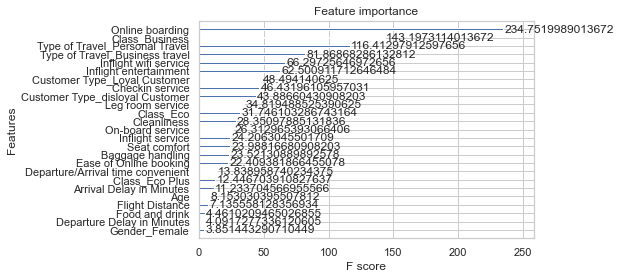

In [59]:
xgb.plot_importance(gbm, importance_type='gain')

In [60]:
model = xgb.XGBClassifier(learning_rate=0.02, n_estimators=600, objective='binary:logistic')

In [61]:
from sklearn.model_selection import RandomizedSearchCV

param_comb = 70

random_search = RandomizedSearchCV(model, param_distributions=params, n_iter=param_comb, scoring='accuracy', n_jobs=-1, cv=10, verbose=3, random_state=42)

random_search.fit(X_train, y_train) 

Fitting 10 folds for each of 70 candidates, totalling 700 fits
[19:49:14] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


RandomizedSearchCV(cv=10,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           enable_categorical=False, gamma=None,
                                           gpu_id=None, importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=0.02,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraint...
                                           predictor=None, random_state=None,
                                           reg_alpha=None, reg_lambda=None,
                           

In [62]:
print('Best score:')
print(random_search.best_score_)

Best score:
0.9560199314303613


In [63]:
print('Best estimator:')
print(random_search.best_estimator_)

Best estimator:
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1.0,
              enable_categorical=False, gamma=1.5, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.02, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=600, n_jobs=8, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=0.6, tree_method='exact', validate_parameters=1,
              verbosity=None)


In [64]:
tuned_xgb = random_search.best_estimator_

In [65]:
model_eval(tuned_xgb, X_train, y_train, bta = 2)

F(2): 0.9556249723071468
Precision : 0.9765678062033054
Recall : 0.9505288673424416


# <a name='we' > Soft voting</a>

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)

In [67]:
model_eval(rf_best, X_train, y_train, bta = 2)

F(2): 0.96018239939827
Precision : 0.9661778618732261
Recall : 0.9586951419854495


In [68]:
model_names = ["tuned_lr","knn_best","rf_best", "tuned_xgb"]

In [69]:
for model_name in model_names:
    curr_model = eval(model_name)
    curr_model.fit(X_train, y_train)
    print(f'{model_name} Train score: {curr_model.score(X_train, y_train)}')
    print(f'{model_name} Test score: {curr_model.score(X_test, y_test)}')
    print('------')

tuned_lr Train score: 0.8150265204181472
tuned_lr Test score: 0.8194315724436206
------
knn_best Train score: 0.7815026520418147
knn_best Test score: 0.6983317886932344
------
rf_best Train score: 0.9757454039857871
rf_best Test score: 0.9491813407476059
------
[19:49:42] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
tuned_xgb Train score: 0.9680210103506874
tuned_xgb Test score: 0.9518072289156626
------


In [70]:
model_vars = [eval(n) for n in model_names]
model_list = list(zip(model_names, model_vars))

In [71]:
model_list

[('tuned_lr', LogisticRegression(C=0.7000000000000001)),
 ('knn_best', KNeighborsClassifier(n_neighbors=7)),
 ('rf_best', RandomForestClassifier(max_depth=12, n_estimators=70)),
 ('tuned_xgb',
  XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
                colsample_bynode=1, colsample_bytree=1.0,
                enable_categorical=False, gamma=1.5, gpu_id=-1,
                importance_type=None, interaction_constraints='',
                learning_rate=0.02, max_delta_step=0, max_depth=5,
                min_child_weight=1, missing=nan, monotone_constraints='()',
                n_estimators=600, n_jobs=8, num_parallel_tree=1, predictor='auto',
                random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
                subsample=0.6, tree_method='exact', validate_parameters=1,
                verbosity=None))]

# create voting classifier

In [72]:

voting_classifer = VotingClassifier(estimators=model_list,
                                    voting='soft', #<-- sklearn calls this soft voting
                                    n_jobs=-1)
voting_classifer.fit(X_train, y_train)

VotingClassifier(estimators=[('tuned_lr',
                              LogisticRegression(C=0.7000000000000001)),
                             ('knn_best', KNeighborsClassifier(n_neighbors=7)),
                             ('rf_best',
                              RandomForestClassifier(max_depth=12,
                                                     n_estimators=70)),
                             ('tuned_xgb',
                              XGBClassifier(base_score=0.5, booster='gbtree',
                                            colsample_bylevel=1,
                                            colsample_bynode=1,
                                            colsample_bytree=1.0,
                                            enable_categorical=False, gamma=1.5...
                                            interaction_constraints='',
                                            learning_rate=0.02,
                                            max_delta_step=0, max_depth=5,
               

# <a name='sc' >Stacking Classifier </a>

In [73]:

stacked = StackingClassifier(
    classifiers=model_vars, meta_classifier=LogisticRegression(), use_probas=False)

In [74]:
stacked.fit(X_train, y_train)

[19:49:57] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


StackingClassifier(classifiers=[LogisticRegression(C=0.7000000000000001),
                                KNeighborsClassifier(n_neighbors=7),
                                RandomForestClassifier(max_depth=12,
                                                       n_estimators=70),
                                XGBClassifier(base_score=0.5, booster='gbtree',
                                              colsample_bylevel=1,
                                              colsample_bynode=1,
                                              colsample_bytree=1.0,
                                              enable_categorical=False,
                                              gamma=1.5, gpu_id=-1,
                                              importance_type=None,
                                              interaction_constraints='',
                                              learning_rate=0.02,
                                              max_delta_step=0, max_depth=5,
         

In [75]:
y_pred1 = stacked.predict(X_train)
accuracy_score(y_train, y_pred1)

0.9745095010041712

In [76]:
y_pred = stacked.predict(X_test)
accuracy_score(y_test, y_pred)

0.9507259808464628

# <a name='' >ROC</a>

ROC AUC score =  0.9924348051081994
Threshold value is: 0.34459034


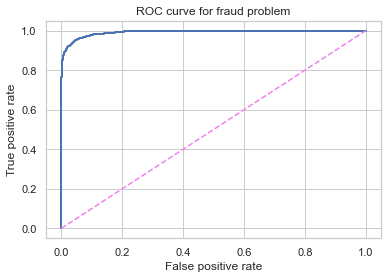

In [77]:
#ROC 
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt  

fpr, tpr, thresholds = roc_curve(y_test, tuned_xgb.predict_proba(X_test)[:,1]) 

plt.plot(fpr, tpr,lw=2)
plt.plot([0,1],[0,1],c='violet',ls='--')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])


plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve for fraud problem');
print("ROC AUC score = ", roc_auc_score(y_test, tuned_xgb.predict_proba(X_test)[:,1]))

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print("Threshold value is:", optimal_threshold)
plt.savefig("ٌroc.png")

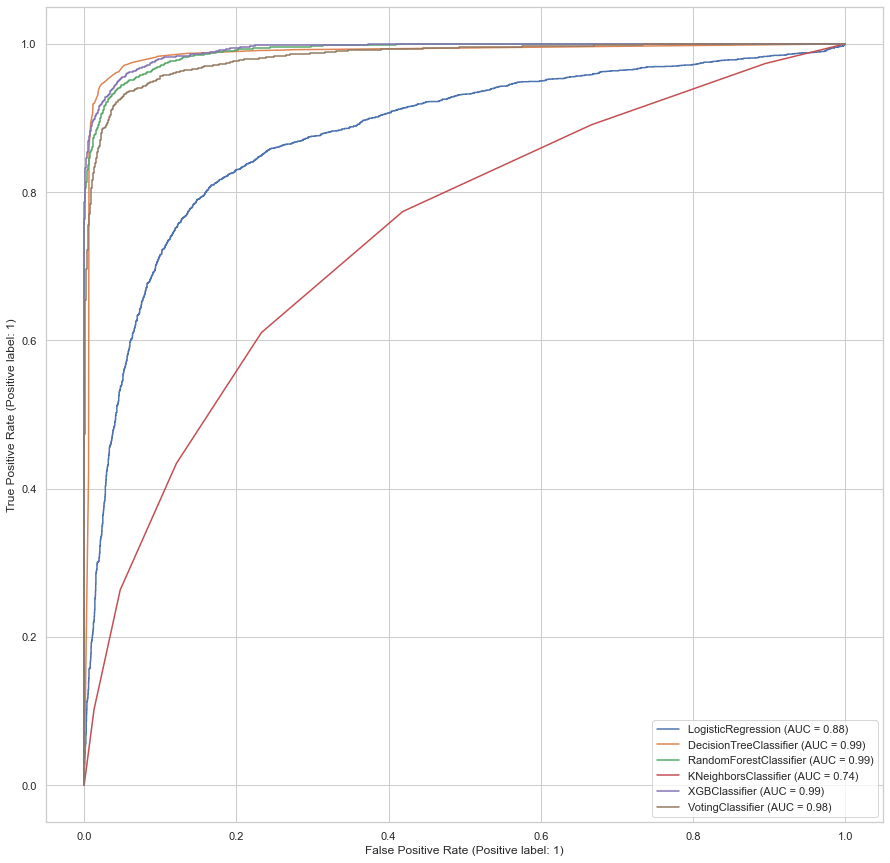

In [78]:
from sklearn.metrics import plot_roc_curve

plt.figure(figsize=(15,15)) 
classifiers = [tuned_lr, dt_best, rf_best, knn_best, tuned_xgb ,voting_classifer]
ax = plt.gca()
for i in classifiers:
    plot_roc_curve(i, X_test, y_test, ax=ax)
plt.savefig("ٌplt-roc-cursve.png")

# <a name='' >Stacking Classifier </a>

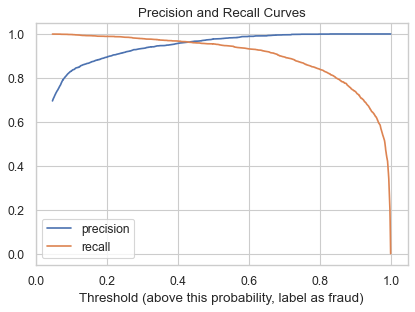

In [79]:
precision_curve, recall_curve, threshold_curve = precision_recall_curve(y_val,rf_best.predict_proba(X_val)[:,1] )
plt.figure(dpi=80)
plt.plot(threshold_curve, precision_curve[1:],label='precision')
plt.plot(threshold_curve, recall_curve[1:], label='recall')
plt.legend(loc='lower left')
plt.xlabel('Threshold (above this probability, label as fraud)');
plt.title('Precision and Recall Curves');


In [80]:
y_pred= rf_best.predict(X_val)

In [81]:
precision_score(y_pred,y_val)

0.9541284403669725

In [82]:
recall_score(y_pred,y_val)

0.9771812080536912

In [83]:
f1_score(y_val, y_pred)

0.9655172413793104

In [84]:
precision_recall_curve(y_pred,y_val)

(array([0.43155049, 0.95412844, 1.        ]),
 array([1.        , 0.97718121, 0.        ]),
 array([0, 1]))

In [85]:
###XGB 

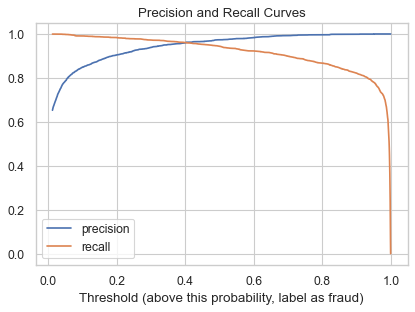

In [86]:
precision_curve, recall_curve, threshold_curve = precision_recall_curve(y_val,tuned_xgb.predict_proba(X_val)[:,1] )
plt.figure(dpi=80)
plt.plot(threshold_curve, precision_curve[1:],label='precision')
plt.plot(threshold_curve, recall_curve[1:], label='recall')
plt.legend(loc='lower left')
plt.xlabel('Threshold (above this probability, label as fraud)');
plt.title('Precision and Recall Curves');
plt.savefig("ٌxgb-prec-reca-curve.png")

In [87]:
y_pred= tuned_xgb.predict(X_val)

In [88]:
precision_score(y_pred,y_val)

0.944517256443862

In [89]:
recall_score(y_pred,y_val)

0.9734353894642053

In [90]:
f1_score(y_val, y_pred)

0.9587583148558758

In [91]:
precision_recall_curve(y_pred,y_val)

(array([0.42884727, 0.94451726, 1.        ]),
 array([1.        , 0.97343539, 0.        ]),
 array([0, 1]))

# <a name='cm' >Confution Matrix </a>

In [92]:
print("Random Forest confusion matrix: \n\n", confusion_matrix(y_val,rf_best.predict(X_val)))

Random Forest confusion matrix: 

 [[2839   51]
 [ 105 2184]]


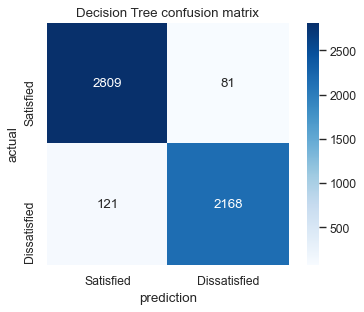

In [93]:
make_confusion_matrix('Decision Tree confusion matrix',dt_best, X_val, y_val, threshold=0.5)

In [94]:
print("XGBoots confusion matrix: \n\n", confusion_matrix(y_val, tuned_xgb.predict(X_val)))

XGBoots confusion matrix: 

 [[2831   59]
 [ 127 2162]]


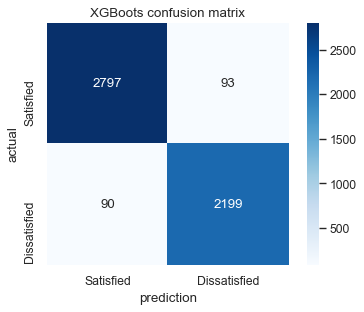

In [112]:
make_confusion_matrix('XGBoots confusion matrix', tuned_xgb, X_val, y_val, threshold=0.4)
plt.savefig("ٌxgb4-CM.png")

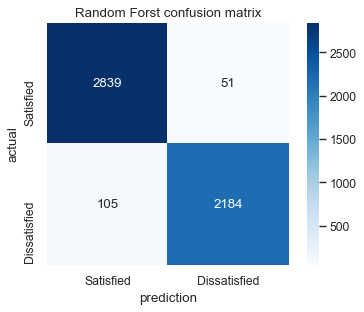

In [96]:
make_confusion_matrix('Random Forst confusion matrix',rf_best, X_val, y_val, threshold=0.5)

In [97]:
# Print confusion matrix for kNN
#rf_confusion = confusion_matrix(y_test,rf_best.predict(X_test))
#plt.figure(dpi=150)
#sns.heatmap(rf_confusion, cmap=plt.cm.Blues, annot=True, square=True, fmt=".1f") 
#plt.xlabel('Predicted species')
#plt.ylabel('Actual species')
#plt.title('Random Forst confusion matrix');